# Domain Analysis

This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


# Importing Modules and Reading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('bank-additional-full.csv')

In [3]:
data

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
...,...
41183,"73;""retired"";""married"";""professional.course"";""..."
41184,"46;""blue-collar"";""married"";""professional.cours..."
41185,"56;""retired"";""married"";""university.degree"";""no..."
41186,"44;""technician"";""married"";""professional.course..."


In [4]:
data.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


##### Since the data is not in proper manner, we will arrange it by its column name.

In [5]:
data = data['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'].str.split(';',expand=True)
data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41184,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41185,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [6]:
# Some columns are not having proper names, so we will rename that names 
# poutcome=previous_outcome
# euribor3m=euribor_rate
# y=subscription_status
data.columns=['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','previous_outcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor_rate','nr.employed','subscription_status']
data 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor_rate,nr.employed,subscription_status
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41184,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41185,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",...,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",...,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [7]:
pd.set_option('display.max_columns', None)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor_rate,nr.employed,subscription_status
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",261,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",149,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",226,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",151,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",307,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""


In [8]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor_rate,nr.employed,subscription_status
41183,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",334,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41184,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",383,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41185,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",189,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",442,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41187,74,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",239,3,999,1,"""failure""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  41188 non-null  object
 1   job                  41188 non-null  object
 2   marital              41188 non-null  object
 3   education            41188 non-null  object
 4   default              41188 non-null  object
 5   housing              41188 non-null  object
 6   loan                 41188 non-null  object
 7   contact              41188 non-null  object
 8   month                41188 non-null  object
 9   day_of_week          41188 non-null  object
 10  duration             41188 non-null  object
 11  campaign             41188 non-null  object
 12  pdays                41188 non-null  object
 13  previous             41188 non-null  object
 14  previous_outcome     41188 non-null  object
 15  emp.var.rate         41188 non-null  object
 16  cons

##### There are no null values present in dataset.
##### All features are of object datatype

In [10]:
# Since pdays is having more than 80% of data with value '999',we can drop that column.
data.drop(columns=['pdays'], inplace=True)

In [11]:
data.describe()
#df1=data[['age','duration','campaign','cons.price.idx','cons.conf.idx','euribor_rate']]
#df=data[['marital','education','default','housing','loan','contact','month','day_of_week','previous_outcome']]
#job,previous,emp.var.rate,nr.employes

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor_rate,nr.employed,subscription_status
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,78,12,4,8,3,3,3,2,10,5,1544,42,8,3,10,26,26,316,11,2
top,31,"""admin.""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""may""","""thu""",90,1,0,"""nonexistent""",1.4,93.994,-36.4,4.857,5228.1,"""no"""
freq,1947,10422,24928,12168,32588,21576,33950,26144,13769,8623,170,17642,35563,35563,16234,7763,7763,2868,16234,36548


# Exploratory Data Analysis

### Univariant Analysis

In [12]:
import sweetviz as sv

my_report=sv.analyze(data)

my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

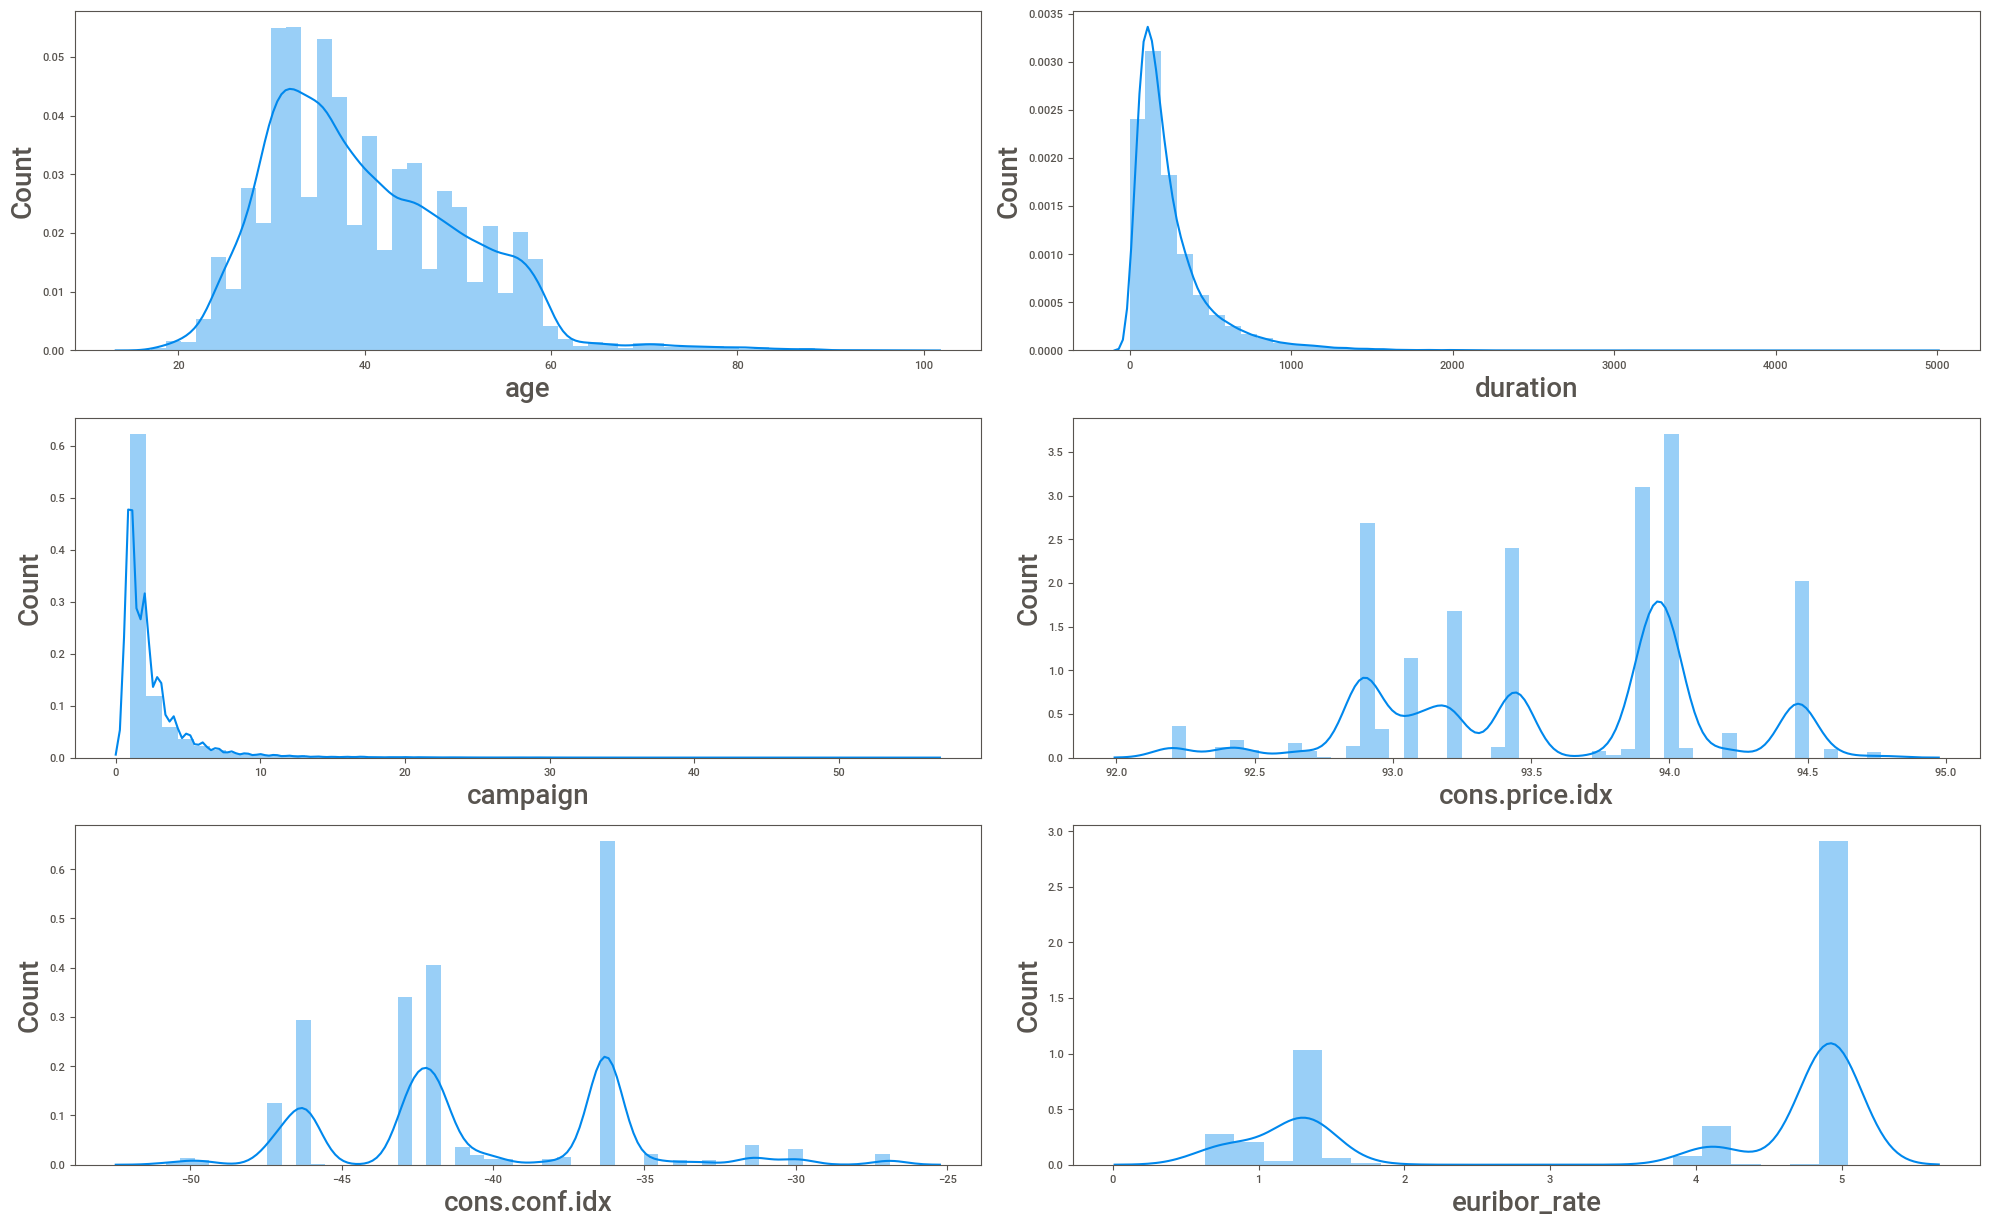

In [13]:
df1=data[['age','duration','campaign','cons.price.idx','cons.conf.idx','euribor_rate']]
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df1:
    ax=plt.subplot(5,2,plotnumber)
    sns.distplot(df1[column])   
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**age**: data is highly skewed to right meaning that are more younger individuals than older ones.Mostly we have data of age is in between range of 20 to 60.

**Campaign**:data is highly skewed to right.In first 10 days, more than 90% contacts were made.

**cons.conf.idx**:Mostly we have data of consumer confidence index is in between range of (-45) to (-35).

**duration**:Mostly we have data of duration is in between range of 0 to 1000.

**cons.price.idx**:We are having highest consumer price index is in range of 94.

**euribor_rate**:We are having highest euribor rate for 3 months is in range of 5.



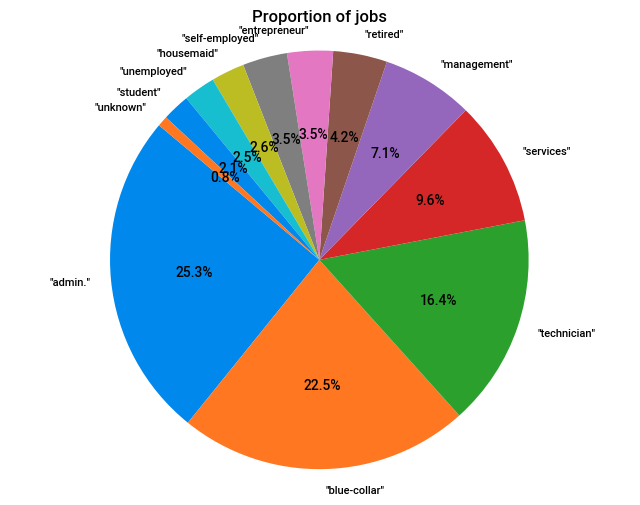

In [14]:
# Calculating the value counts for each category
category_counts = data['job'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of jobs')
plt.show()

##### We can see almost 48% data is of admin and blue collar jobs

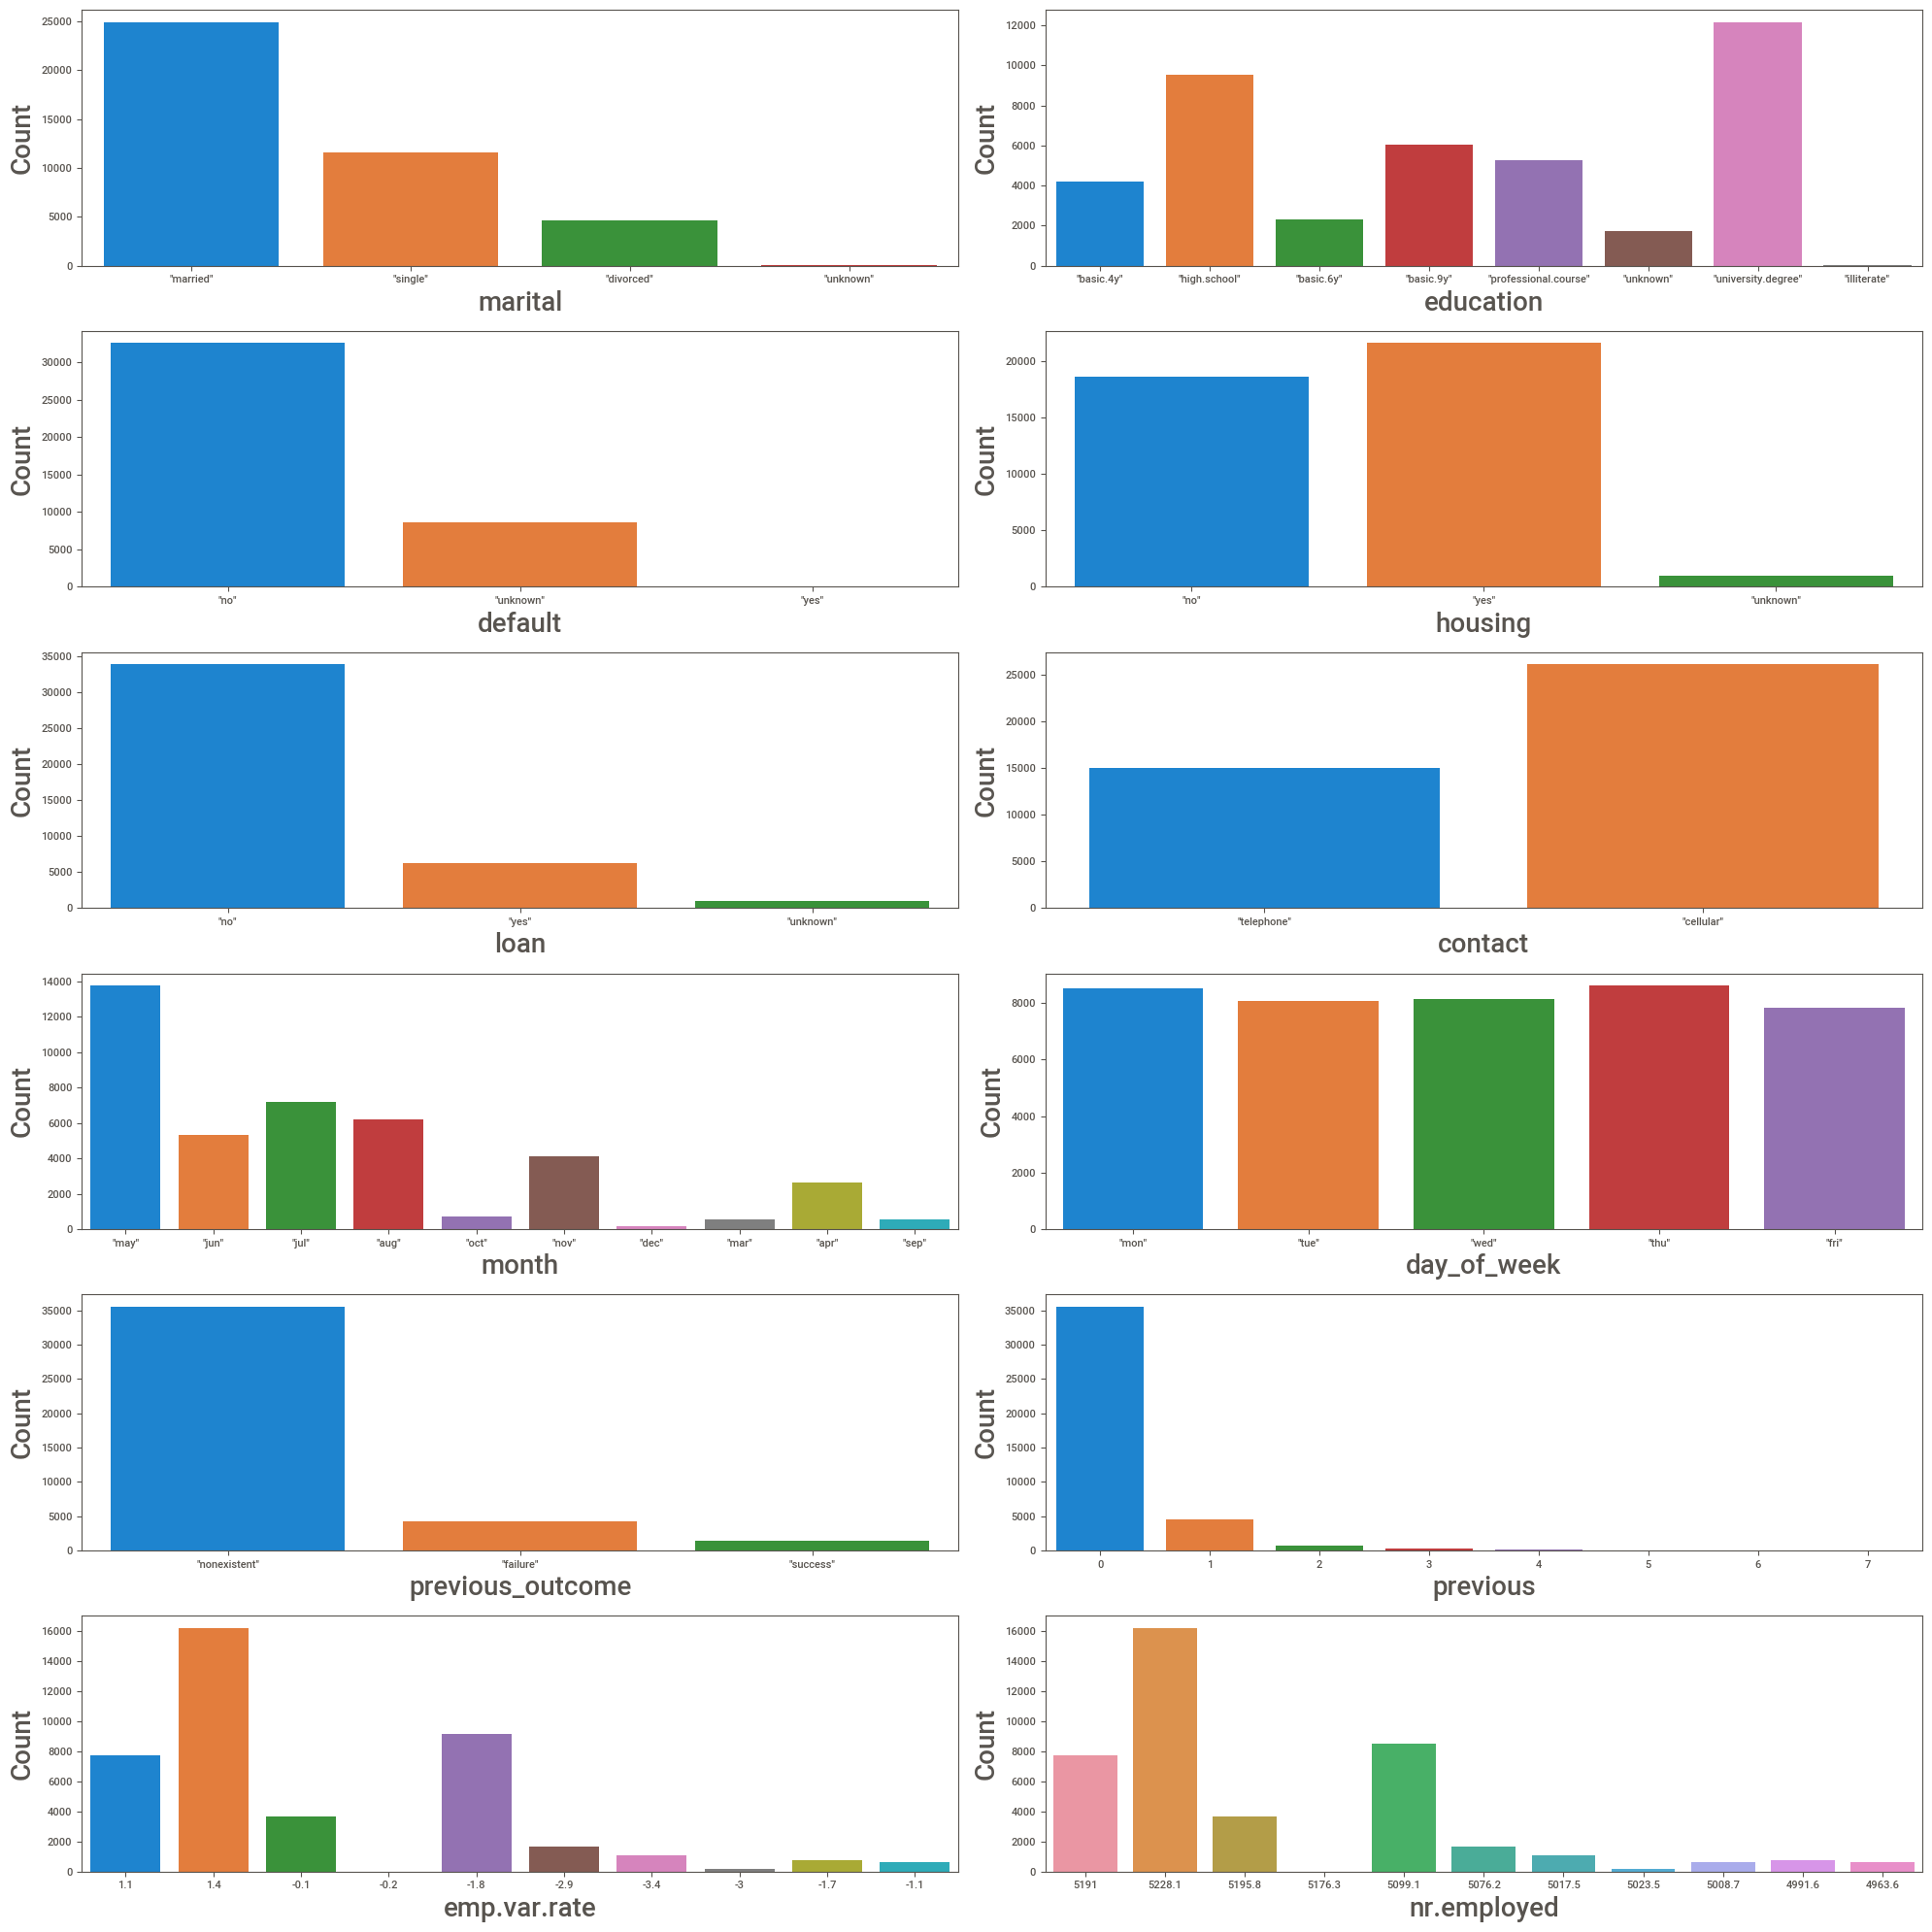

In [15]:
df=data[['marital','education','default','housing','loan','contact','month','day_of_week','previous_outcome','previous','emp.var.rate','nr.employed']]
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    ax=plt.subplot(6,2,plotnumber)
    sns.countplot(x=column,data=df)   
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Marital**: Almost we have data of married people.

**Default**: Max people are not having credit in default that means they haven't taken loan previously.

**loan**   : Max people have not previously applied for loan.

**education** : degree university and high school have top 2 frequencies.

**Housing** : We have equal % of data for people who are previously having and not having housing loan

**Month** : In may month of the year,mostly customers last contacted month.

**Day_of_week** : There is no definite relationship.

**previous** : For this particular data, previous contacts made are of little importance.

### Bivariant Analysis

In [16]:
# Continuous and discrete data
#data1=data[['age','duration','campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor_rate','nr.employed']].astype(float)

# Categorical data
#data2=data[['job','marital','education','default','housing','loan','contact','month','day_of_week','previous_outcome']]

In [17]:
df.columns

Index(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'previous_outcome', 'previous', 'emp.var.rate',
       'nr.employed'],
      dtype='object')

In [18]:
df=data[['job','marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'previous_outcome', 'previous', 'emp.var.rate',
       'nr.employed']]

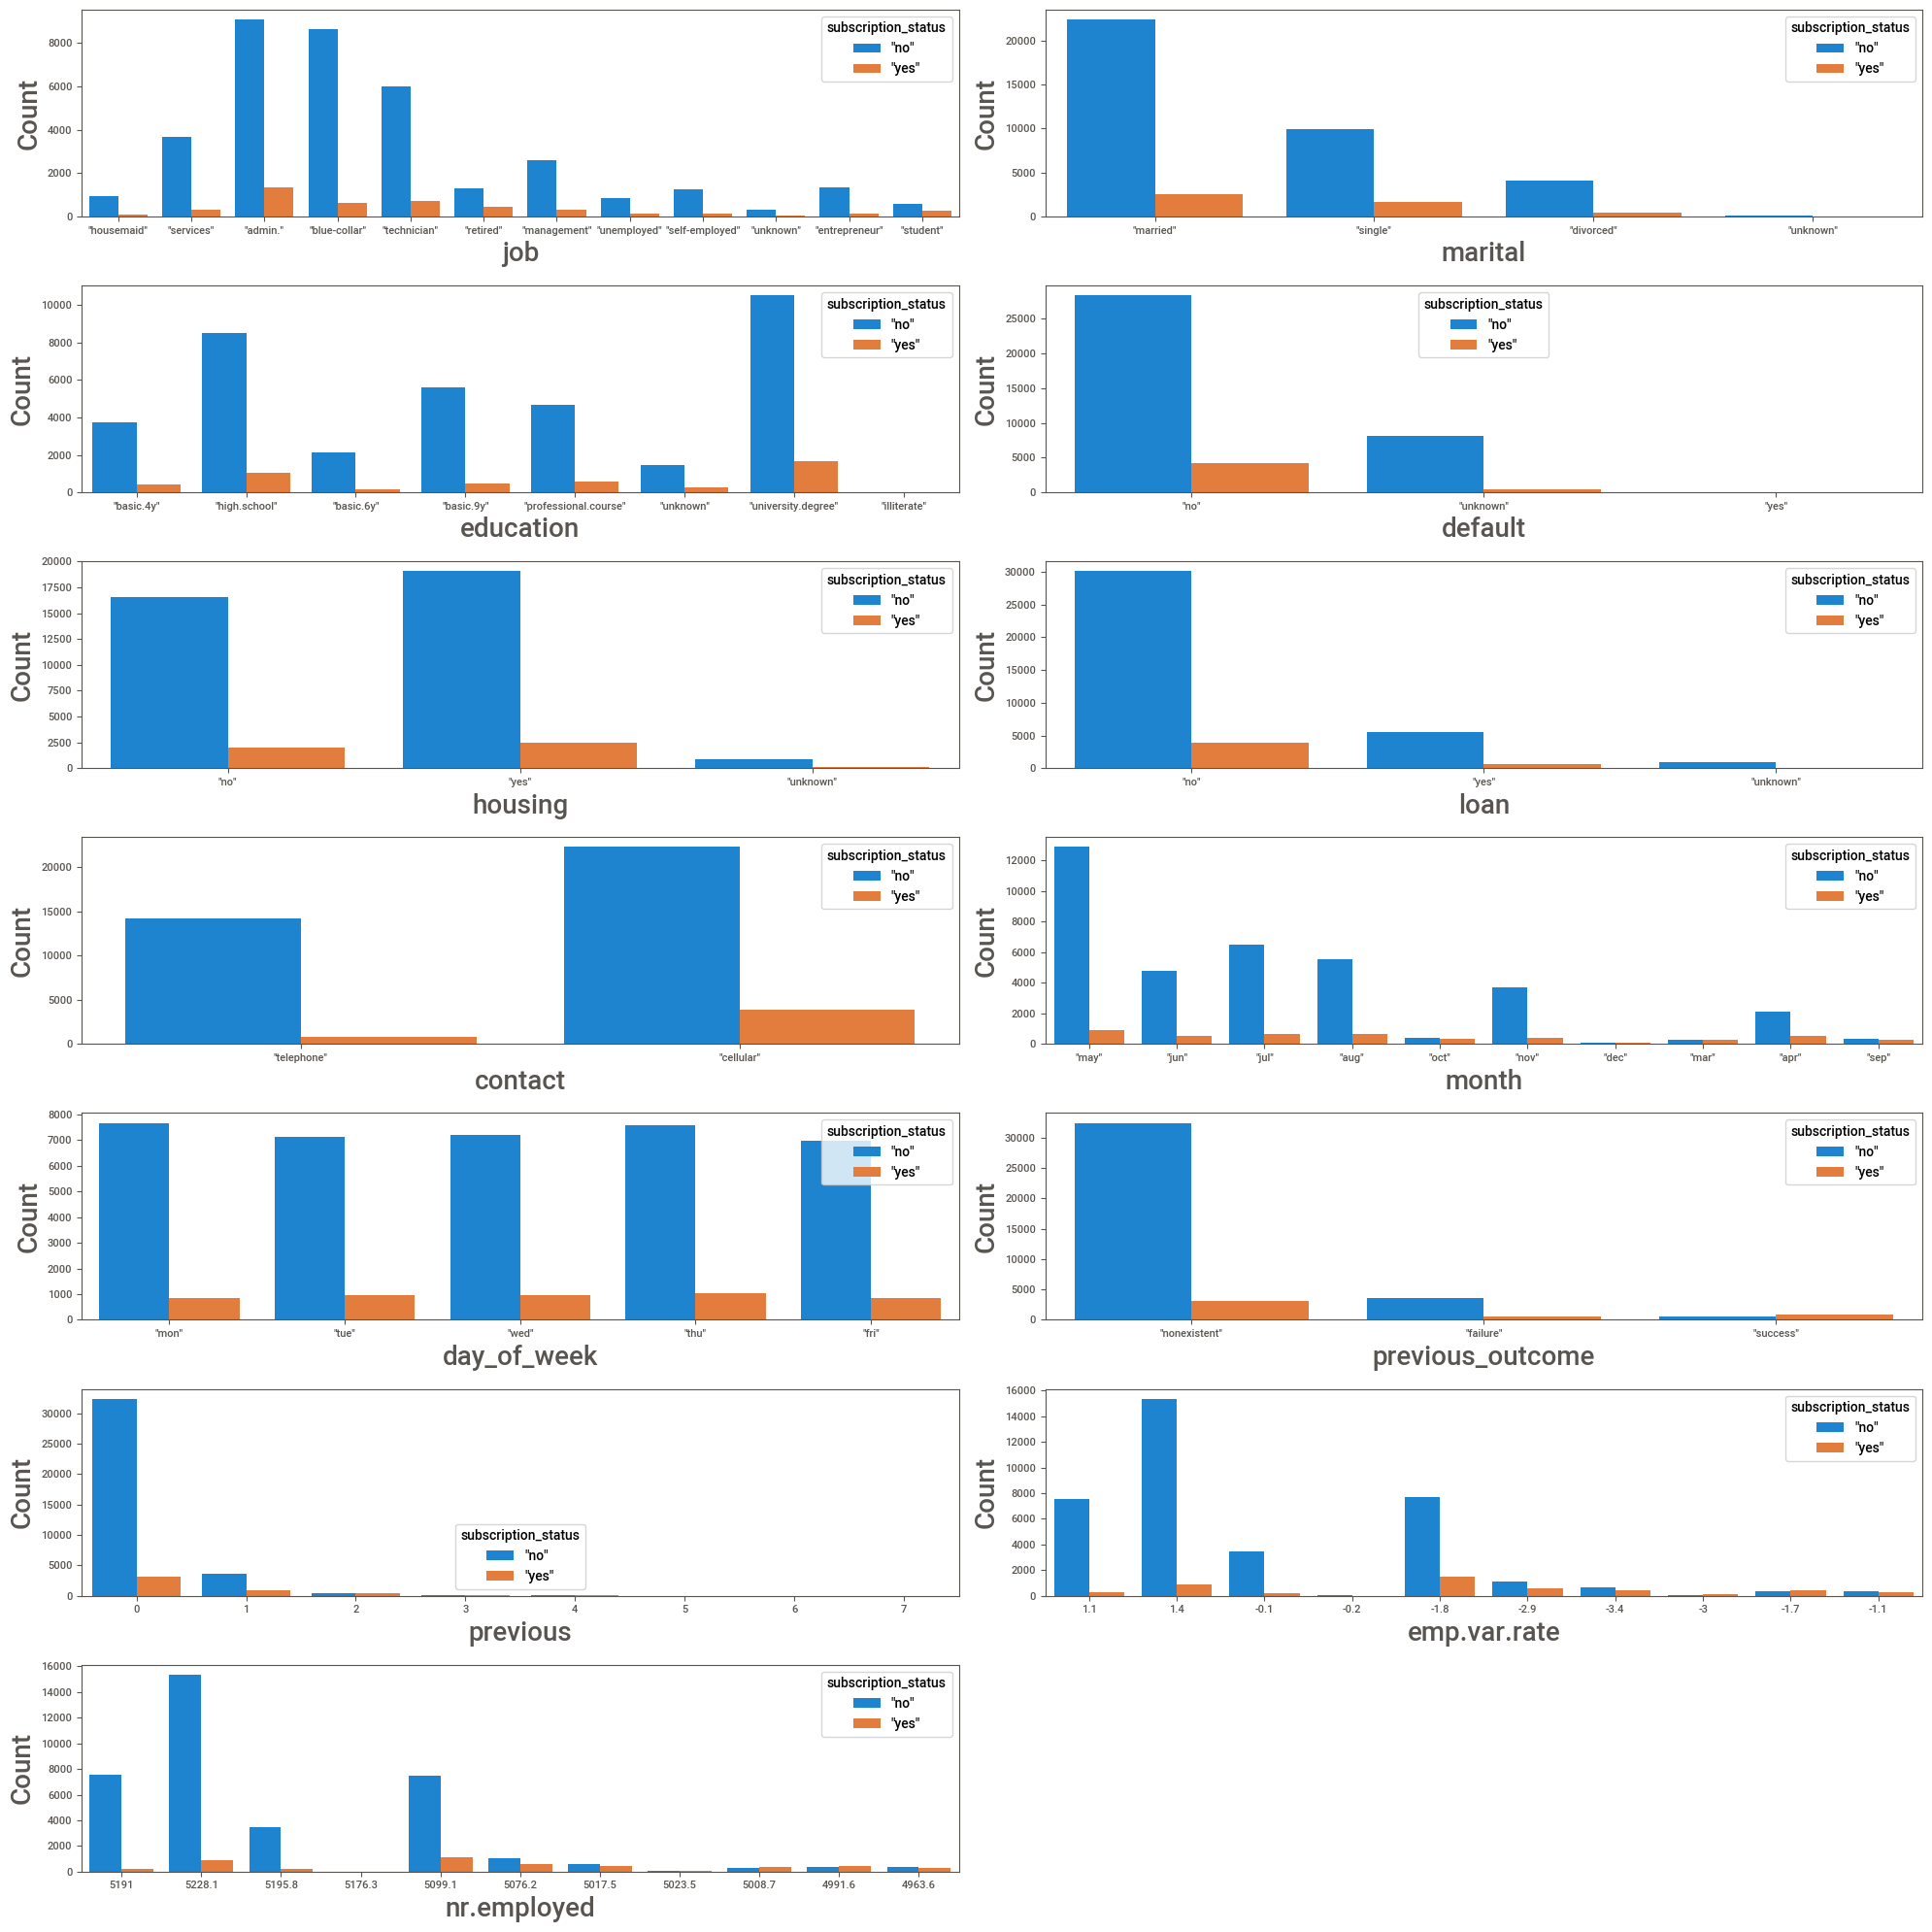

In [19]:
# For categorical data we will find correlation through histplot.
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    ax=plt.subplot(7,2,plotnumber)
    sns.countplot(data=df, x=column, hue=data.subscription_status)
    #plt.xticks(rotation=90)   
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Insights**

All of the categories shows subscription status NO as dominant status which indicated that term deposite has not subscribed.

In [20]:
df1

,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor_rate
0,56,261,1,93.994,-36.4,4.857
1,57,149,1,93.994,-36.4,4.857
2,37,226,1,93.994,-36.4,4.857
3,40,151,1,93.994,-36.4,4.857
4,56,307,1,93.994,-36.4,4.857
...,...,...,...,...,...,...
41183,73,334,1,94.767,-50.8,1.028
41184,46,383,1,94.767,-50.8,1.028
41185,56,189,2,94.767,-50.8,1.028
41186,44,442,1,94.767,-50.8,1.028


In [21]:
df1.columns

Index(['age', 'duration', 'campaign', 'cons.price.idx', 'cons.conf.idx',
       'euribor_rate'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_12564\3220171753.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age'] = pd.to_numeric(df1['age'], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12564\3220171753.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['age'], inplace=True)


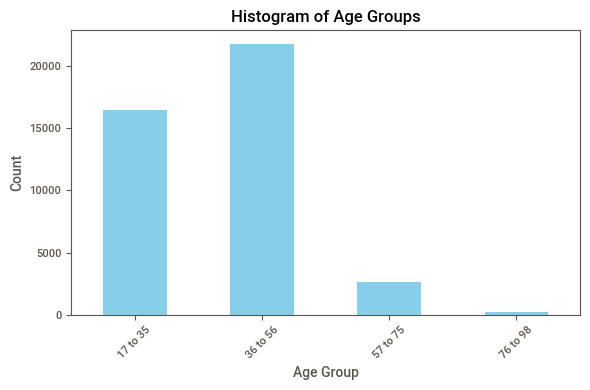

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 already contains the data

# Convert 'age' column to numeric if it's not already
df1['age'] = pd.to_numeric(df1['age'], errors='coerce')

# Drop NaN values in 'age' column
df1.dropna(subset=['age'], inplace=True)

# Define bins and labels
bins = [17, 36, 57, 76, 98]
labels = ['17 to 35', '36 to 56', '57 to 75', '76 to 98']

# Initialize a dictionary to hold the counts for each age group
age_group_counts = {label: 0 for label in labels}

# Iterate over the data and count the number of occurrences in each age group
for age in df1['age']:
    for i in range(len(bins) - 1):
        if bins[i] <= age < bins[i + 1]:
            age_group_counts[labels[i]] += 1
            break  # Break the loop once the age group is found

# Convert the dictionary to a pandas Series for plotting
age_group_series = pd.Series(age_group_counts)

# Plotting the histogram
plt.figure(figsize=(6, 4))
age_group_series.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Histogram of Age Groups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [23]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor_rate,nr.employed,subscription_status
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",261,1,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",149,1,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",226,1,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",151,1,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",307,1,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",334,1,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41184,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",383,1,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41185,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",189,2,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41186,44,"""technician""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",442,1,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""


In [24]:
df1

,age,duration,campaign,cons.price.idx,cons.conf.idx,euribor_rate
0,56,261,1,93.994,-36.4,4.857
1,57,149,1,93.994,-36.4,4.857
2,37,226,1,93.994,-36.4,4.857
3,40,151,1,93.994,-36.4,4.857
4,56,307,1,93.994,-36.4,4.857
...,...,...,...,...,...,...
41183,73,334,1,94.767,-50.8,1.028
41184,46,383,1,94.767,-50.8,1.028
41185,56,189,2,94.767,-50.8,1.028
41186,44,442,1,94.767,-50.8,1.028


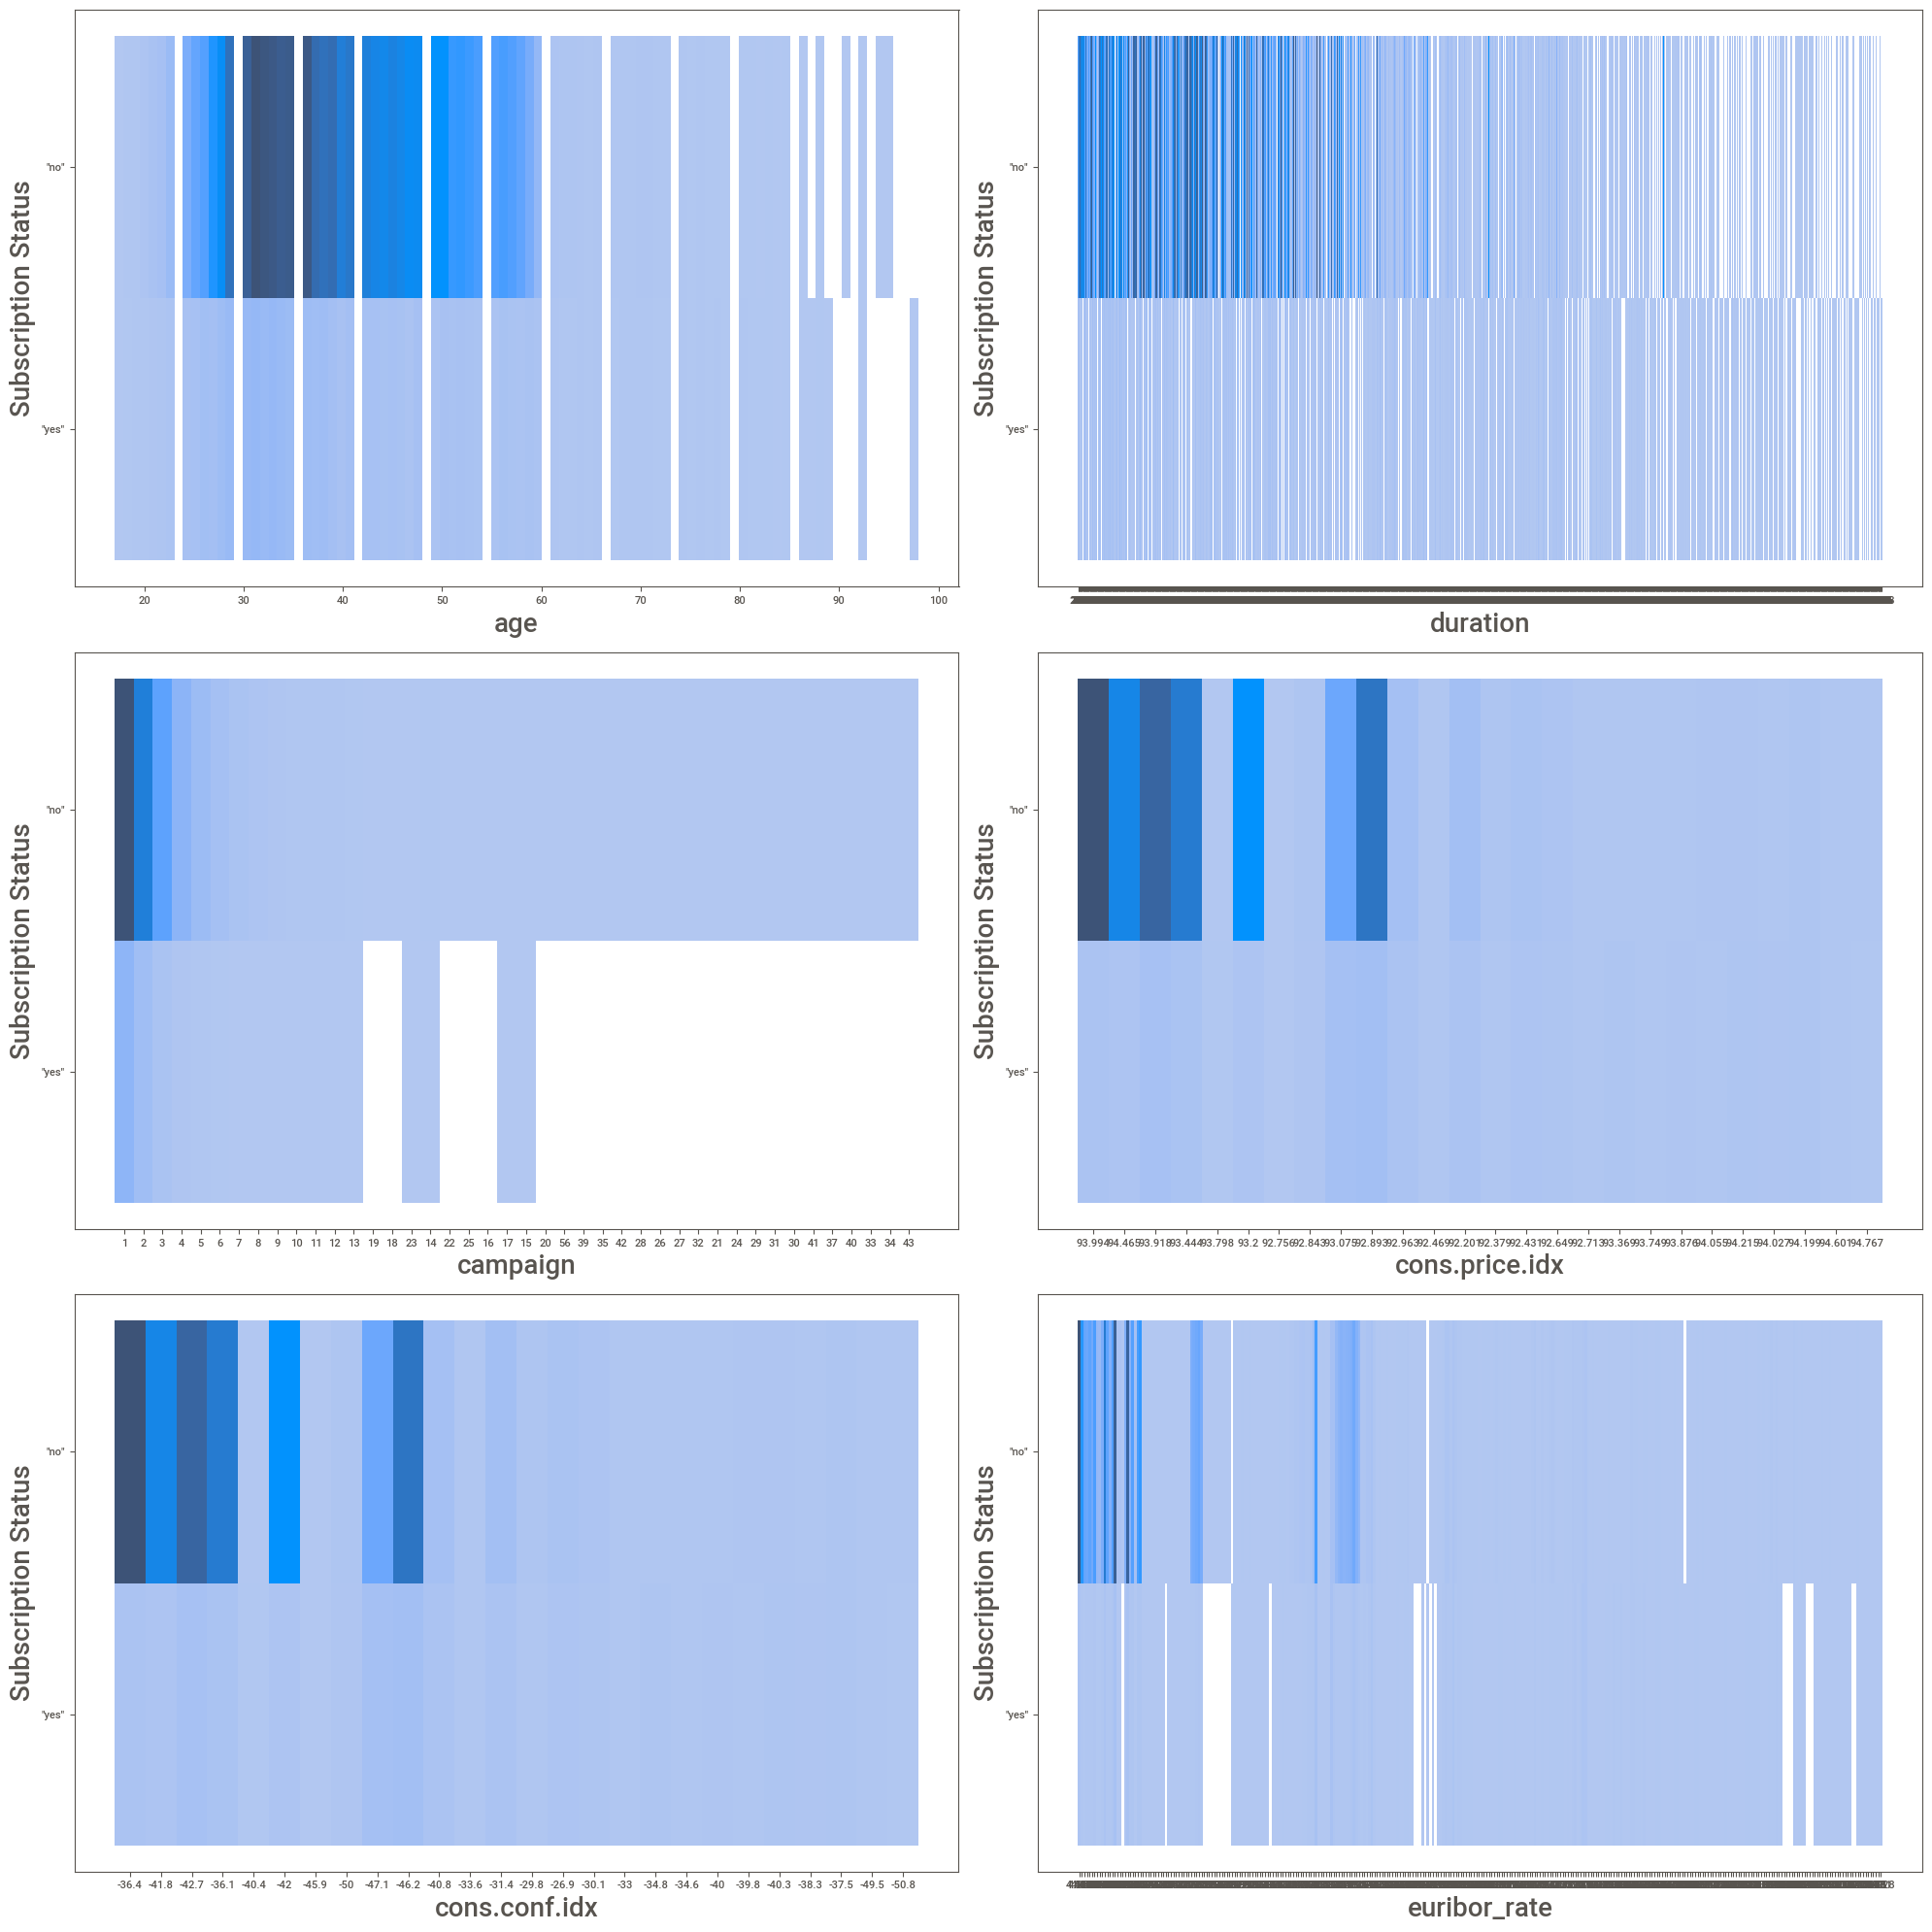

In [25]:
# For continuous and discrete data we will find correlation through histplot.
plt.figure(figsize=(20, 20), facecolor='white')
plotnumber = 1

for column in df1:
    ax = plt.subplot(3, 2, plotnumber)
    sns.histplot(x=column,y=data.subscription_status,data=df1)
    plt.xlabel(column, fontsize=20)
    plt.ylabel('Subscription Status', fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

**Insights**

1. As age is increasing, number of chances to get subscribed for term deposite decreasing.
2. If duration is increasing, number of chances to get subscribed for term deposite decreasing.
3. Persons who are having consumer price index as 94, having less number of chances to get subscribed for term deposite decreasing.

# Data PreProcessing

### Handle Null values

In [26]:
data.isnull().sum()

age                    0
job                    0
marital                0
education              0
default                0
housing                0
loan                   0
contact                0
month                  0
day_of_week            0
duration               0
campaign               0
previous               0
previous_outcome       0
emp.var.rate           0
cons.price.idx         0
cons.conf.idx          0
euribor_rate           0
nr.employed            0
subscription_status    0
dtype: int64

### Handle Categorical data

In [27]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data.job = label.fit_transform(data.job)
data.marital = label.fit_transform(data.marital)
data.education = label.fit_transform(data.education)
data.default = label.fit_transform(data.default)
data.housing = label.fit_transform(data.housing)
data.loan = label.fit_transform(data.loan)
data.contact = label.fit_transform(data.contact)
data.month = label.fit_transform(data.month)
data.day_of_week = label.fit_transform(data.day_of_week)
data.previous_outcome = label.fit_transform(data.previous_outcome)
data.subscription_status = label.fit_transform(data.subscription_status)

In [28]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor_rate,nr.employed,subscription_status
0,56,3,1,0,0,0,0,1,6,1,261,1,0,1,1.1,93.994,-36.4,4.857,5191,0
1,57,7,1,3,1,0,0,1,6,1,149,1,0,1,1.1,93.994,-36.4,4.857,5191,0
2,37,7,1,3,0,2,0,1,6,1,226,1,0,1,1.1,93.994,-36.4,4.857,5191,0
3,40,0,1,1,0,0,0,1,6,1,151,1,0,1,1.1,93.994,-36.4,4.857,5191,0
4,56,7,1,3,0,0,2,1,6,1,307,1,0,1,1.1,93.994,-36.4,4.857,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


### Handle Outliers

In [29]:
df1=data[['age','duration','campaign']]

In [30]:
df1.columns

Index(['age', 'duration', 'campaign'], dtype='object')

In [31]:
df1

,age,duration,campaign
0,56,261,1
1,57,149,1
2,37,226,1
3,40,151,1
4,56,307,1
...,...,...,...
41183,73,334,1
41184,46,383,1
41185,56,189,2
41186,44,442,1


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


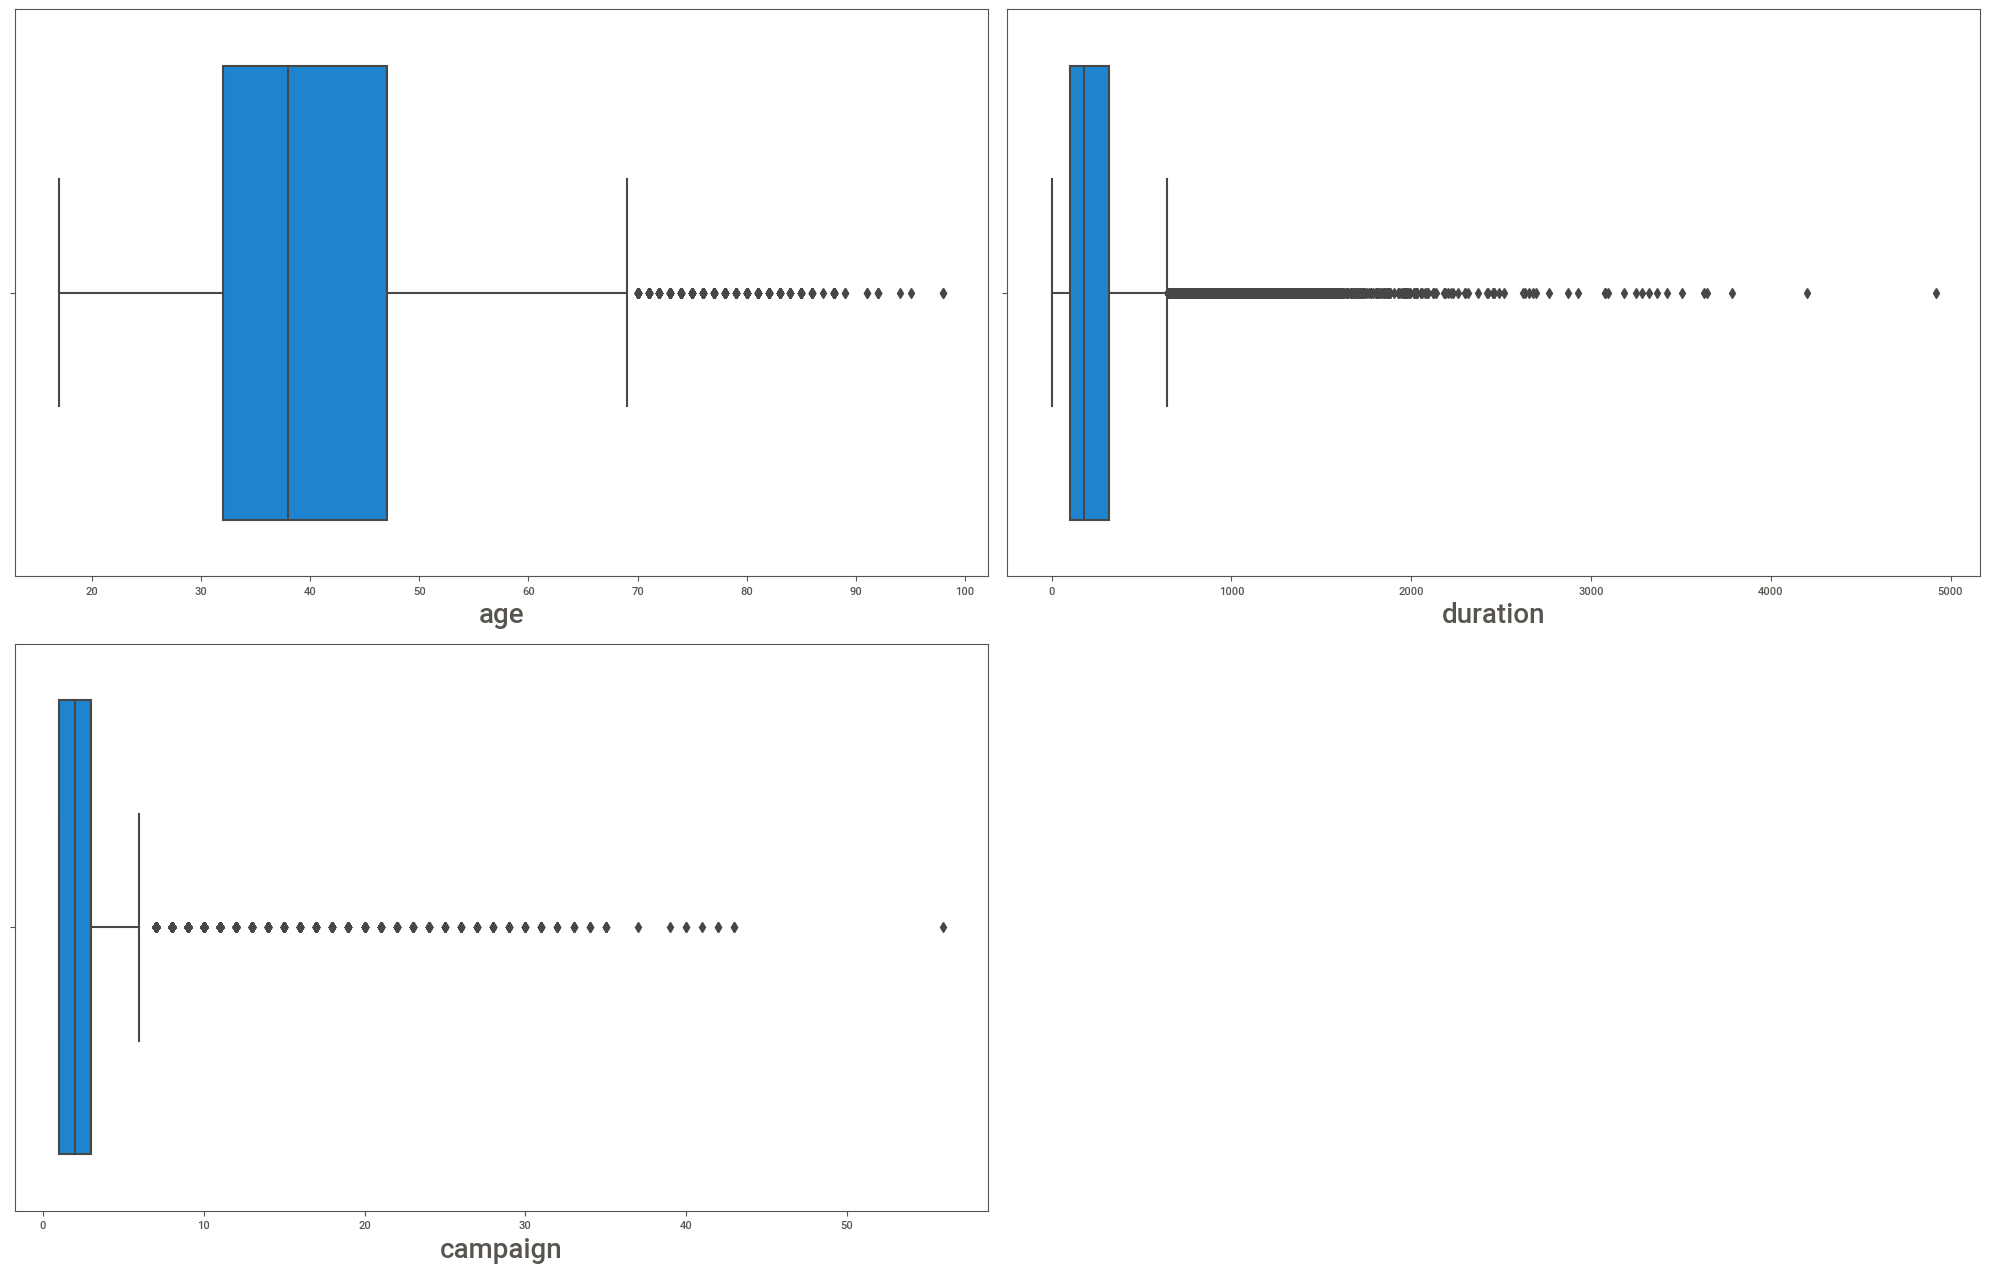

In [32]:
# We will check presence of outliers on continuous data

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df1:
    if plotnumber<8:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(df1[column].astype(int))
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

##### No need to handle outliers.

### Scaling the data

In [33]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor_rate,nr.employed,subscription_status
0,56,3,1,0,0,0,0,1,6,1,261,1,0,1,1.1,93.994,-36.4,4.857,5191,0
1,57,7,1,3,1,0,0,1,6,1,149,1,0,1,1.1,93.994,-36.4,4.857,5191,0
2,37,7,1,3,0,2,0,1,6,1,226,1,0,1,1.1,93.994,-36.4,4.857,5191,0
3,40,0,1,1,0,0,0,1,6,1,151,1,0,1,1.1,93.994,-36.4,4.857,5191,0
4,56,7,1,3,0,0,2,1,6,1,307,1,0,1,1.1,93.994,-36.4,4.857,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [34]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'previous_outcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor_rate', 'nr.employed', 'subscription_status'],
      dtype='object')

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=data[['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'previous',
       'previous_outcome', 'emp.var.rate','euribor_rate', 'subscription_status']]
data1=sc.fit_transform(data.drop(dl,axis=1))

In [36]:
data1.shape

(41188, 5)

In [37]:
con_data=data[['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'previous',
       'previous_outcome', 'emp.var.rate','euribor_rate', 'subscription_status']]
con_data

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,previous_outcome,emp.var.rate,euribor_rate,subscription_status
0,3,1,0,0,0,0,1,6,1,1,0,1,1.1,4.857,0
1,7,1,3,1,0,0,1,6,1,1,0,1,1.1,4.857,0
2,7,1,3,0,2,0,1,6,1,1,0,1,1.1,4.857,0
3,0,1,1,0,0,0,1,6,1,1,0,1,1.1,4.857,0
4,7,1,3,0,0,2,1,6,1,1,0,1,1.1,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,7,0,1,0,1,-1.1,1.028,1
41184,1,1,5,0,0,0,0,7,0,1,0,1,-1.1,1.028,0
41185,5,1,6,0,2,0,0,7,0,2,0,1,-1.1,1.028,0
41186,9,1,5,0,0,0,0,7,0,1,0,1,-1.1,1.028,1


In [38]:
data2=pd.DataFrame(data1,columns=['age','duration','nr.employed','cons.price.idx','cons.conf.idx']) # duration and nr.employed columns are in array so we will convert it into dataframe

In [39]:
data2

,age,duration,nr.employed,cons.price.idx,cons.conf.idx
0,0.481481,0.053070,0.698753,0.60251,0.859735
1,0.493827,0.030297,0.698753,0.60251,0.859735
2,0.246914,0.045954,0.698753,0.60251,0.859735
3,0.283951,0.030704,0.698753,0.60251,0.859735
4,0.481481,0.062424,0.698753,0.60251,0.859735
...,...,...,...,...,...
41183,0.691358,0.067914,1.000000,0.00000,0.000000
41184,0.358025,0.077877,1.000000,0.00000,0.000000
41185,0.481481,0.038430,1.000000,0.00000,0.000000
41186,0.333333,0.089874,1.000000,0.00000,0.000000


In [40]:
final_df=pd.concat([con_data,data2],axis=1,join='inner') # concatenation of duration and nr.employed with other columns.

In [41]:
final_df

,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,previous_outcome,emp.var.rate,euribor_rate,subscription_status,age,duration,nr.employed,cons.price.idx,cons.conf.idx
0,3,1,0,0,0,0,1,6,1,1,0,1,1.1,4.857,0,0.481481,0.053070,0.698753,0.60251,0.859735
1,7,1,3,1,0,0,1,6,1,1,0,1,1.1,4.857,0,0.493827,0.030297,0.698753,0.60251,0.859735
2,7,1,3,0,2,0,1,6,1,1,0,1,1.1,4.857,0,0.246914,0.045954,0.698753,0.60251,0.859735
3,0,1,1,0,0,0,1,6,1,1,0,1,1.1,4.857,0,0.283951,0.030704,0.698753,0.60251,0.859735
4,7,1,3,0,0,2,1,6,1,1,0,1,1.1,4.857,0,0.481481,0.062424,0.698753,0.60251,0.859735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,7,0,1,0,1,-1.1,1.028,1,0.691358,0.067914,1.000000,0.00000,0.000000
41184,1,1,5,0,0,0,0,7,0,1,0,1,-1.1,1.028,0,0.358025,0.077877,1.000000,0.00000,0.000000
41185,5,1,6,0,2,0,0,7,0,2,0,1,-1.1,1.028,0,0.481481,0.038430,1.000000,0.00000,0.000000
41186,9,1,5,0,0,0,0,7,0,1,0,1,-1.1,1.028,1,0.333333,0.089874,1.000000,0.00000,0.000000


In [42]:
final_df.isnull().sum()

job                    0
marital                0
education              0
default                0
housing                0
loan                   0
contact                0
month                  0
day_of_week            0
campaign               0
previous               0
previous_outcome       0
emp.var.rate           0
euribor_rate           0
subscription_status    0
age                    0
duration               0
nr.employed            0
cons.price.idx         0
cons.conf.idx          0
dtype: int64

# Feature Selection

<AxesSubplot:>

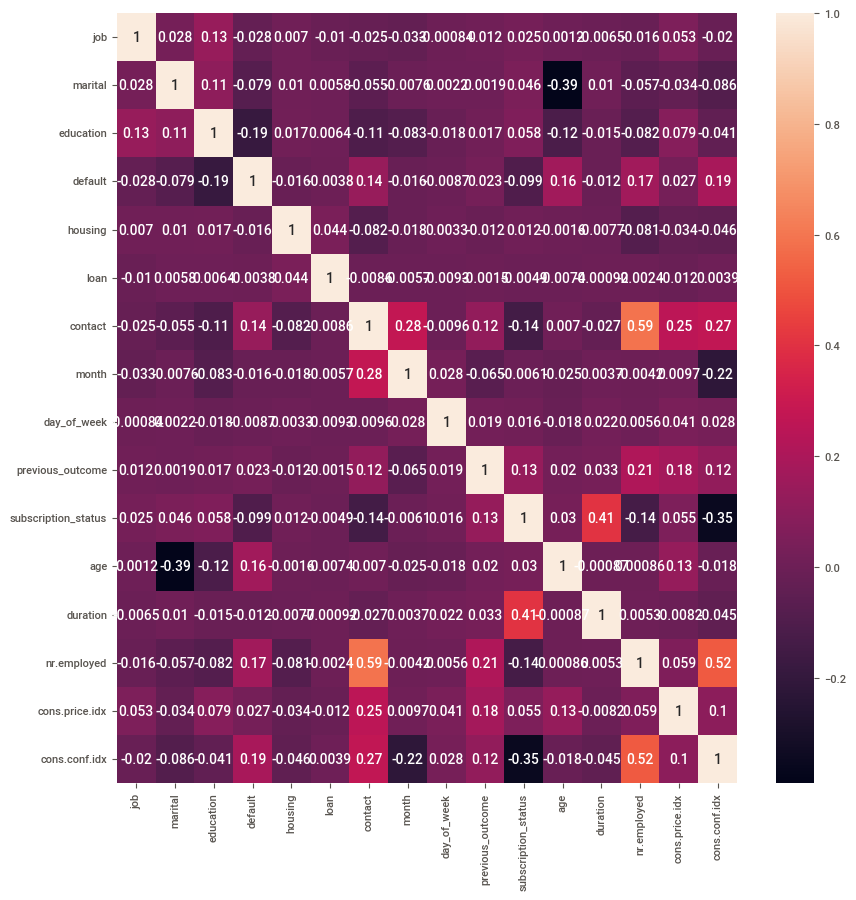

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(final_df.corr(),annot=True)

# Model Creation

In [44]:
# Convert specified columns to numeric data types
numeric_columns = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor_rate']
final_df[numeric_columns] = final_df[numeric_columns].astype(float)

# Check data types after conversion
print(final_df.dtypes)

job                      int32
marital                  int32
education                int32
default                  int32
housing                  int32
loan                     int32
contact                  int32
month                    int32
day_of_week              int32
campaign               float64
previous               float64
previous_outcome         int32
emp.var.rate           float64
euribor_rate           float64
subscription_status      int32
age                    float64
duration               float64
nr.employed            float64
cons.price.idx         float64
cons.conf.idx          float64
dtype: object


In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

# Assuming 'df' is your DataFrame with features and 'PerformanceRating'
# Make sure to replace 'YourTargetColumnName' with the actual column name for the target variable

# Feature columns
X = final_df.drop('subscription_status', axis=1)

# Target variable
y = final_df['subscription_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE()
x_smote,y_smote = sm.fit_resample(X_train,y_train)
from collections import Counter  # checking data balanced or not
print(Counter(y_train))
print(Counter(y_smote))

Counter({0: 29245, 1: 3705})
Counter({0: 29245, 1: 29245})


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(x_smote, y_smote)  # Use SMOTE-resampled data for training
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f'Logistic Regression Accuracy: {logistic_accuracy}')

# Support Vector Machine (SVM) classifier
svm_model = SVC()
svm_model.fit(x_smote, y_smote)  # Use SMOTE-resampled data for training
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy}')

# Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_smote, y_smote)  # Use SMOTE-resampled data for training
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')

# XGBoost classifier
xgb_model = XGBClassifier()
xgb_model.fit(x_smote, y_smote)  # Use SMOTE-resampled data for training
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f'XGBoost Accuracy: {xgb_accuracy}')

# Artificial Neural Network (ANN) classifier
ann_model = MLPClassifier(max_iter=1000, random_state=42)
ann_model.fit(x_smote, y_smote)  # Use SMOTE-resampled data for training
ann_predictions = ann_model.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_predictions)
print(f'ANN Accuracy: {ann_accuracy}')


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8588249575139597
SVM Accuracy: 0.844743869871328
Random Forest Accuracy: 0.903495994173343
XGBoost Accuracy: 0.9051954357853847
ANN Accuracy: 0.8897790725904345


### Hyperparameter tuning for XGBoost

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3)
}

# Create the XGBoost classifier
xgb_model = XGBClassifier()

# Instantiate the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy', verbose=2, random_state=42, n_jobs=-1)

# Perform the randomized search on the training data
random_search.fit(x_smote, y_smote)

# Print the best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions on the test data using the best model
xgb_predictions = best_xgb_model.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print(f'XGBoost Accuracy after hyperparameter tuning: {xgb_accuracy}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found by RandomizedSearchCV:
{'learning_rate': 0.06990213464750791, 'max_depth': 9, 'n_estimators': 293}
XGBoost Accuracy after hyperparameter tuning: 0.9047098810390871


### Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean accuracy
mean_accuracy = np.mean(cv_scores)
print("Mean Accuracy:", mean_accuracy)


Cross-Validation Scores: [0.88795824 0.36331634 0.66363195 0.13791429 0.14240622]
Mean Accuracy: 0.43904540714991597


In [50]:
from sklearn.metrics import f1_score

# Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_smote, y_smote)  # Use SMOTE-resampled data for training
rf_predictions = rf_model.predict(X_test)
rf_f1_score = f1_score(y_test, rf_predictions)  # Calculate F1 score
print(f'Random Forest F1 Score: {rf_f1_score}')

Random Forest F1 Score: 0.6300604932526757


In [51]:
from sklearn.metrics import f1_score

# XGBoost classifier
xgb_model = XGBClassifier()
xgb_model.fit(x_smote, y_smote)  # Use SMOTE-resampled data for training
xgb_predictions = xgb_model.predict(X_test)
xgb_f1_score = f1_score(y_test, xgb_predictions)  # Calculate F1 score
print(f'XGBoost F1 Score: {xgb_f1_score}')


XGBoost F1 Score: 0.6150813208477083


### ROC AUC Curve

XGBoost ROC AUC Score: 0.9408615315220982


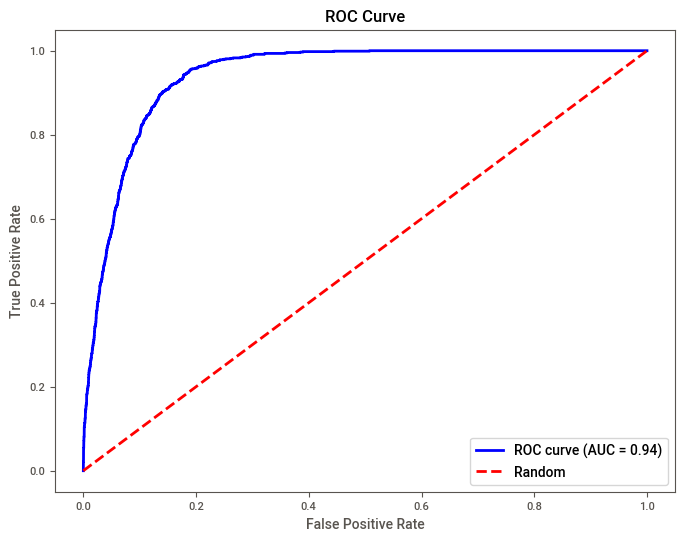

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train the XGBoost classifier on SMOTE-resampled data
xgb_model.fit(x_smote, y_smote)

# Get predicted probabilities for the positive class
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)

print(f'XGBoost ROC AUC Score: {roc_auc}')

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Evaluation Report

Based on the provided evaluation metrics, the performance of the models can be compared as follows:

**Logistic Regression:** 
   Accuracy Score: 0.8588
   
**Support Vector Machine (SVM):**
   Accuracy Score: 0.8447

**Random Forest:**
   Accuracy Score: 0.9034

**Xtreme Gradient Boosting (XGB):**
   Accuracy Score: 0.9051

**Artificial Neural Network (ANN):**
   Accuracy Score: 0.8897
   

**As we can see,XGBoosting is giving best Accuracy score, we will check hyperparameter tuning of it**

**After Hyperparameter Tuning of XGBoosting:**
   Accuracy Score: 0.9047


**Based on the Accuracy score, XGBoost with hyperparameter tuning, achieves the highest performance with an Accuracy score of 0.9047. This suggests that the XGBoost with hyperparameter tuning, provides the best fit to the data among the models considered.**


ROC AUC Curve having best ROC score as **0.9408** indicates that the model has good discriminatory power across different threshold values.An AUC of 0.9408 suggests that the model has strong discriminatory power, as it correctly ranks positive instances higher than negative instances in 94% of cases. In other words, the model is effective at distinguishing between the positive and negative classes.